# Lab 3 - ALEXNET on CIFAR10 Dataset
## AISHWARYA HASTAK
---

In [ ]:
!pip3 install torch==1.10.0+cu111 torchvision==0.11.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torch

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.0+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.autograd import grad

# Initial Model

Files already downloaded and verified
Files already downloaded and verified

 Loss for epoch  0 :  0.03189178556203842

 Accuracy for epoch  0 :  30.244

 Correct predictions for epoch  0 :  15122

 Loss for epoch  1 :  0.029986893758177757

 Accuracy for epoch  1 :  43.087997

 Correct predictions for epoch  1 :  21544

 Loss for epoch  2 :  0.030350446701049805

 Accuracy for epoch  2 :  50.222

 Correct predictions for epoch  2 :  25111

 Loss for epoch  3 :  0.029732700437307358

 Accuracy for epoch  3 :  55.78

 Correct predictions for epoch  3 :  27890

 Loss for epoch  4 :  0.02881596051156521

 Accuracy for epoch  4 :  60.666

 Correct predictions for epoch  4 :  30333

 Loss for epoch  5 :  0.02843739464879036

 Accuracy for epoch  5 :  64.512

 Correct predictions for epoch  5 :  32256

 Loss for epoch  6 :  0.029533812776207924

 Accuracy for epoch  6 :  68.152

 Correct predictions for epoch  6 :  34076

 Loss for epoch  7 :  0.027332644909620285

 Accuracy for epoch  7 :  

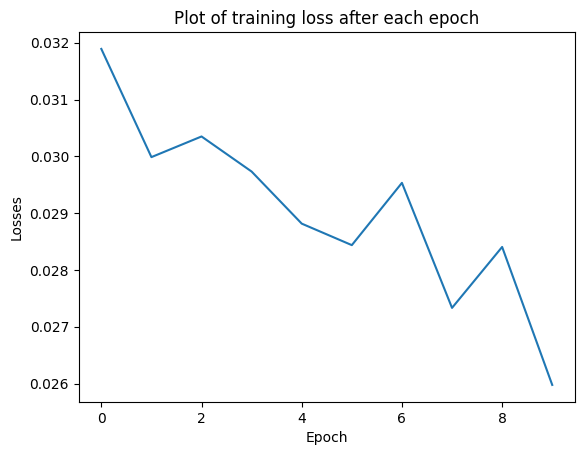

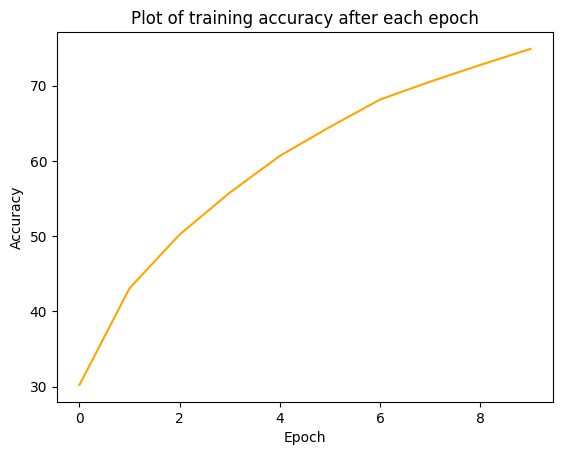

Final Testing Accuracy :  70.2


In [ ]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose(
        [transforms.Resize((227,227)),
         transforms.ToTensor(),
          transforms.Normalize(0, 1)])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.conv4 = nn.Conv2d(384,384, kernel_size = 3, stride = 1, padding = 1)
    self.conv5 = nn.Conv2d(384,256,kernel_size=3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(256*6*6,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x


# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 10
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

The Initial Model acheived an accuracy of 70%

We will now try to optimize our model by changing some aspect such as the non-linear activation functions, cost function, number of convolution layers, number of fully connected layers.

---

I have added dropout layers with 0.5 probability after each of the first 2 fully connected layers, which means each neuron has a 50% probability of being dropped.

The original paper has used Local Response Normalization (LRN) and Batch Normalization technique, I have also added ***batch normalization*** after the first two convolution layers.

I have used the ***He initialization*** technqiue, which initializes the weights from a normal distribution based on the number of inputs to that layers and is typically used for convulation and fully connected layers that use ReLU activation.

While training the paper had suggested a batch size of 64 or 128, I have used a batch size of 128.

---
---

# Changing the number of Convulation layers



## Removed the fifth Conv2d layer and changed the output channels of the fourth Conv2d layer from 384 to 256.

Files already downloaded and verified
Files already downloaded and verified

 Loss for epoch  0 :  0.030402755364775658

 Accuracy for epoch  0 :  39.478

 Correct predictions for epoch  0 :  19739

 Loss for epoch  1 :  0.028138775378465652

 Accuracy for epoch  1 :  56.472

 Correct predictions for epoch  1 :  28236

 Loss for epoch  2 :  0.02781776152551174

 Accuracy for epoch  2 :  64.532

 Correct predictions for epoch  2 :  32266

 Loss for epoch  3 :  0.027371931821107864

 Accuracy for epoch  3 :  70.312

 Correct predictions for epoch  3 :  35156

 Loss for epoch  4 :  0.026972031220793724

 Accuracy for epoch  4 :  73.67

 Correct predictions for epoch  4 :  36835

 Loss for epoch  5 :  0.02562524378299713

 Accuracy for epoch  5 :  76.928

 Correct predictions for epoch  5 :  38464


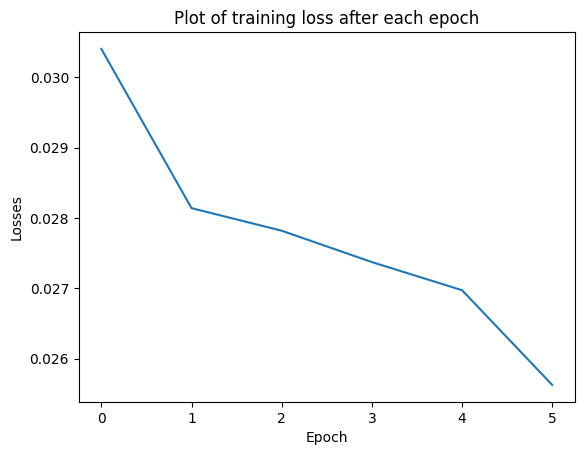

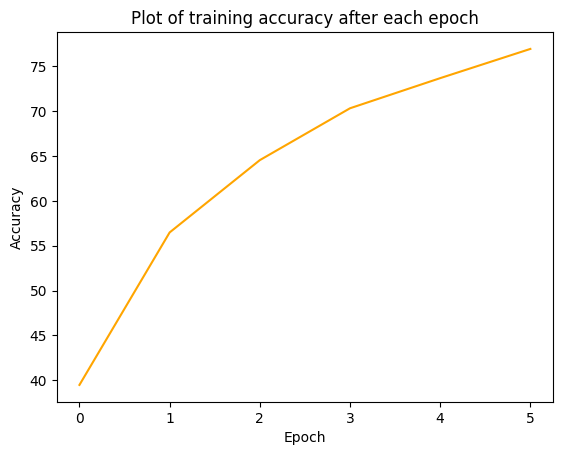

Final Testing Accuracy :  73.09


In [ ]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
    )
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
    )

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.conv4 = nn.Conv2d(384,256, kernel_size = 3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(1024,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x


# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

Accuracy: 73%

---

## Removed the fourth Conv2D layer which leaves only the first 3 convolution layers

Files already downloaded and verified
Files already downloaded and verified

 Loss for epoch  0 :  0.03001561388373375

 Accuracy for epoch  0 :  38.829998

 Correct predictions for epoch  0 :  19415

 Loss for epoch  1 :  0.030149703845381737

 Accuracy for epoch  1 :  51.857998

 Correct predictions for epoch  1 :  25929

 Loss for epoch  2 :  0.028224702924489975

 Accuracy for epoch  2 :  58.302

 Correct predictions for epoch  2 :  29151

 Loss for epoch  3 :  0.02873883582651615

 Accuracy for epoch  3 :  62.241997

 Correct predictions for epoch  3 :  31121

 Loss for epoch  4 :  0.027733255177736282

 Accuracy for epoch  4 :  65.369995

 Correct predictions for epoch  4 :  32685

 Loss for epoch  5 :  0.0280885212123394

 Accuracy for epoch  5 :  68.215996

 Correct predictions for epoch  5 :  34108


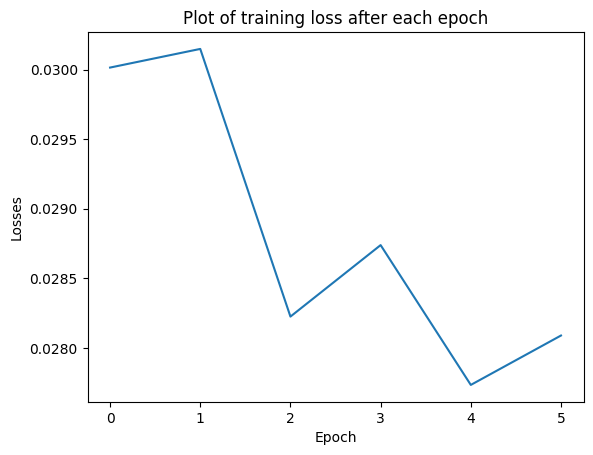

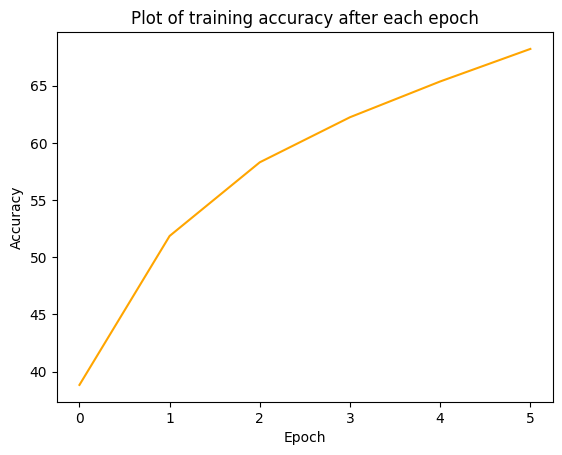

Final Testing Accuracy :  67.0


In [ ]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
    )
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
    )

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(384*4*4,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size = 3)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x

# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

 Accuracy:  67%

 Thoughts:
Decreasing the depth of the model by removing some convolution layers, has increased the accuracy of the model. This could be because of a lower model complexity which works better when we have a smaller dataset. The CIFAR10 dataset is a relatively small dataset and would work well with a smaller model.

---
---

# Stack different number of FC layers


## 2 FC layers

### Removed the second FC layer, which leaves us with only 2 FC layers

Files already downloaded and verified
Files already downloaded and verified

 Loss for epoch  0 :  0.030879031866788864

 Accuracy for epoch  0 :  40.432

 Correct predictions for epoch  0 :  20216

 Loss for epoch  1 :  0.029645424336194992

 Accuracy for epoch  1 :  52.989998

 Correct predictions for epoch  1 :  26495

 Loss for epoch  2 :  0.02927364408969879

 Accuracy for epoch  2 :  58.809998

 Correct predictions for epoch  2 :  29405

 Loss for epoch  3 :  0.028100594878196716

 Accuracy for epoch  3 :  62.281998

 Correct predictions for epoch  3 :  31141

 Loss for epoch  4 :  0.028418442234396935

 Accuracy for epoch  4 :  65.326

 Correct predictions for epoch  4 :  32663

 Loss for epoch  5 :  0.02824379876255989

 Accuracy for epoch  5 :  67.728

 Correct predictions for epoch  5 :  33864


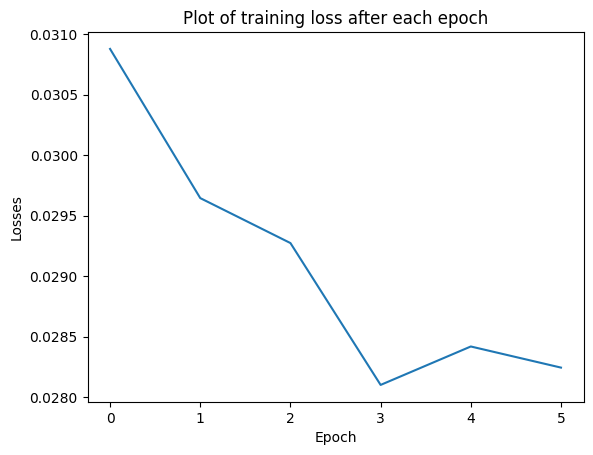

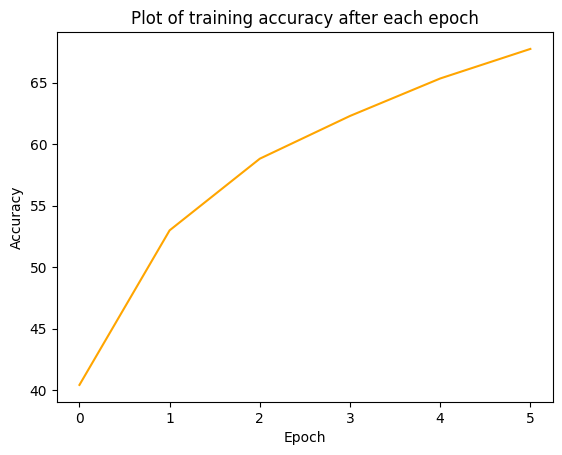

Final Testing Accuracy :  61.73


In [5]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
    )
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
    )

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.conv4 = nn.Conv2d(384,256, kernel_size = 3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(1024,4096)
    self.fc2 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv4(x))
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.softmax(self.fc2(x),dim = -1)
    return x


# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

 Accuracy:  61%

---
---

## 1 FC layer

### Using only 1 FC layer which is the last layer, and we use the sigmoid activation for classification of 10 classes.

Files already downloaded and verified
Files already downloaded and verified

 Loss for epoch  0 :  0.03151007369160652

 Accuracy for epoch  0 :  31.363998

 Correct predictions for epoch  0 :  15682

 Loss for epoch  1 :  0.03186490759253502

 Accuracy for epoch  1 :  38.666

 Correct predictions for epoch  1 :  19333

 Loss for epoch  2 :  0.031061921268701553

 Accuracy for epoch  2 :  41.357998

 Correct predictions for epoch  2 :  20679

 Loss for epoch  3 :  0.03142544999718666

 Accuracy for epoch  3 :  44.718

 Correct predictions for epoch  3 :  22359

 Loss for epoch  4 :  0.03227859362959862

 Accuracy for epoch  4 :  46.424

 Correct predictions for epoch  4 :  23212

 Loss for epoch  5 :  0.030678605660796165

 Accuracy for epoch  5 :  48.587997

 Correct predictions for epoch  5 :  24294


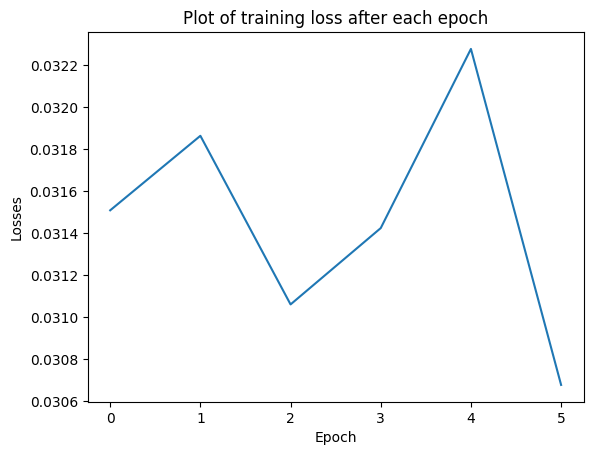

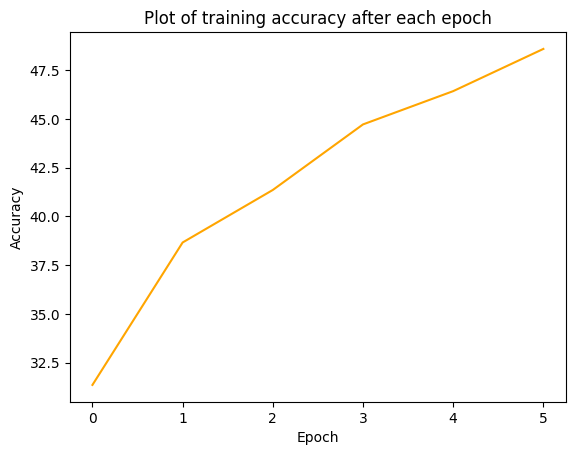

Final Testing Accuracy :  56.59


In [17]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
    )
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
    )

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]


class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.conv4 = nn.Conv2d(384,256, kernel_size = 3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(1024,10)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv4(x))
    x = F.avg_pool2d(x, kernel_size = 3, stride = 2)
    x = x.view(x.size(0), -1)
    x = F.softmax(self.fc1(x),dim = -1)
    return x


# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

 Accuracy:  56%

Thoughts:

Decreasing the depth of the model by removing some convolution layers, has decreased the accuracy of the model. This could be because lesser Fully Connected layers mean lesser neurons to process and make sense of the data which could lead to underfitting.

I had also tried to fit the model on 4 Fully Connected layers where it performed worse, which could be because of more complex model which might not be needed since this dataset is relatively small.

---
---

# Using Leaky ReLU activation function

### Used Leaky ReLU instead of ReLU for the convulation layers

100%|██████████| 170498071/170498071 [00:03<00:00, 45699022.43it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

 Loss for epoch  0 :  0.03202875703573227

 Accuracy for epoch  0 :  32.682

 Correct predictions for epoch  0 :  16341

 Loss for epoch  1 :  0.02869468927383423

 Accuracy for epoch  1 :  48.098

 Correct predictions for epoch  1 :  24049

 Loss for epoch  2 :  0.028594356030225754

 Accuracy for epoch  2 :  57.932

 Correct predictions for epoch  2 :  28966

 Loss for epoch  3 :  0.02890217863023281

 Accuracy for epoch  3 :  62.677998

 Correct predictions for epoch  3 :  31339

 Loss for epoch  4 :  0.02903161384165287

 Accuracy for epoch  4 :  65.804

 Correct predictions for epoch  4 :  32902

 Loss for epoch  5 :  0.028323611244559288

 Accuracy for epoch  5 :  68.296

 Correct predictions for epoch  5 :  34148


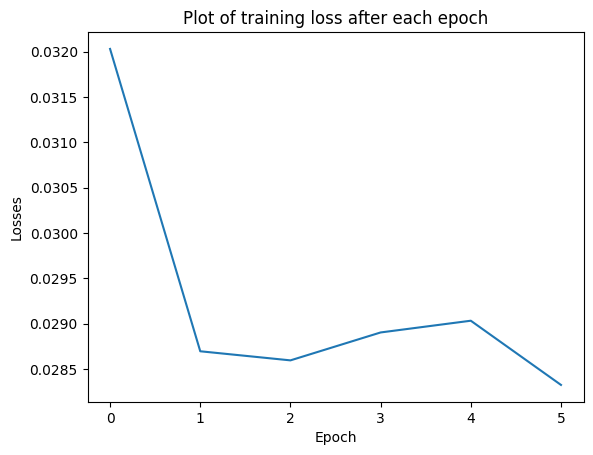

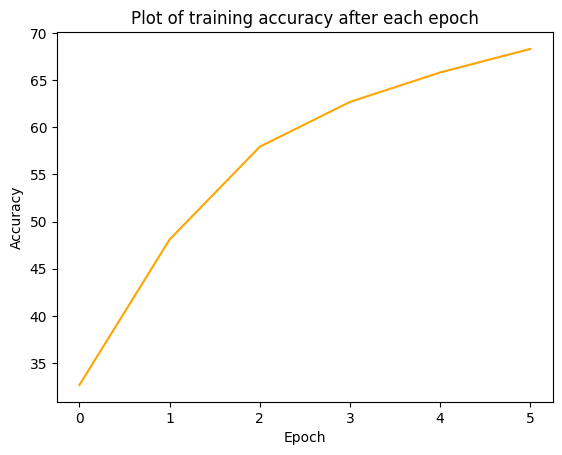

Final Testing Accuracy :  62.829998


In [3]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(384*4*4,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='leaky_relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='leaky_relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.leaky_relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.leaky_relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size = 3)
    x = x.view(x.size(0), -1)
    x = F.leaky_relu(self.fc1(x))
    x = self.dropout(x)
    x = F.leaky_relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x

# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())

 Accuracy: 62.82%


 Thoughts:

Leaky-ReLU did not help much with increasing the accuracy.






---



---



# Using BCE loss function
### We use Binary Cross-Entropy loss instead of Cross Entropy Loss

Files already downloaded and verified
Files already downloaded and verified


<ipython-input-5-42f04a6df8b4>:102: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_label = F.one_hot(torch.tensor(labels),10).float()



 Loss for epoch  0 :  0.0021406495943665504

 Accuracy for epoch  0 :  53.398

 Correct predictions for epoch  0 :  26699

 Loss for epoch  1 :  0.001962031703442335

 Accuracy for epoch  1 :  71.5

 Correct predictions for epoch  1 :  35750

 Loss for epoch  2 :  0.0018724864348769188

 Accuracy for epoch  2 :  77.577995

 Correct predictions for epoch  2 :  38789

 Loss for epoch  3 :  0.0011504222638905048

 Accuracy for epoch  3 :  81.36

 Correct predictions for epoch  3 :  40680

 Loss for epoch  4 :  0.0013684704899787903

 Accuracy for epoch  4 :  84.201996

 Correct predictions for epoch  4 :  42101

 Loss for epoch  5 :  0.0011898789089173079

 Accuracy for epoch  5 :  86.546

 Correct predictions for epoch  5 :  43273


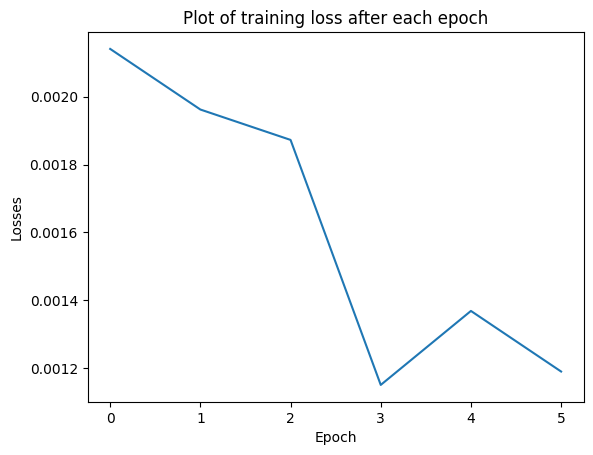

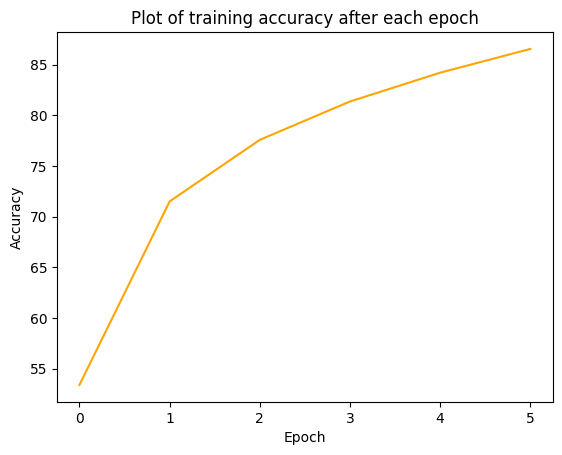

Final Testing Accuracy :  80.04


In [5]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(384*4*4,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size = 3)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x


# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 6
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    one_hot_label = F.one_hot(torch.tensor(labels),10).float()
    loss = criterion(outputs, one_hot_label)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
  print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
  print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
  all_losses.append(loss.item()/batch_size)
  all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(num_epochs)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(num_epochs)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())


 Accuracy: 80 %

 Thoughts: BCE Loss gave better accuracy than Cross Entropy Loss.

---
---

# Final Model


 Used 3 Convolution layers, 3 fully-connected layer and BCE Loss function.
 Ran it over 20 epochs.

Files already downloaded and verified
Files already downloaded and verified


<ipython-input-6-87137bb9efdb>:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_label = F.one_hot(torch.tensor(labels),10).float()



 Loss for epoch  0 :  0.002445208141580224

 Accuracy for epoch  0 :  55.03

 Correct predictions for epoch  0 :  27515

 Loss for epoch  2 :  0.001692736055701971

 Accuracy for epoch  2 :  77.608

 Correct predictions for epoch  2 :  38804

 Loss for epoch  4 :  0.0010714526288211346

 Accuracy for epoch  4 :  84.406

 Correct predictions for epoch  4 :  42203

 Loss for epoch  6 :  0.0010259588016197085

 Accuracy for epoch  6 :  88.576

 Correct predictions for epoch  6 :  44288

 Loss for epoch  8 :  0.0006223602104000747

 Accuracy for epoch  8 :  91.68

 Correct predictions for epoch  8 :  45840

 Loss for epoch  10 :  0.0005286337691359222

 Accuracy for epoch  10 :  94.18

 Correct predictions for epoch  10 :  47090

 Loss for epoch  12 :  0.0004446469247341156

 Accuracy for epoch  12 :  95.285995

 Correct predictions for epoch  12 :  47643

 Loss for epoch  14 :  0.00034321611747145653

 Accuracy for epoch  14 :  96.341995

 Correct predictions for epoch  14 :  48171

 Los

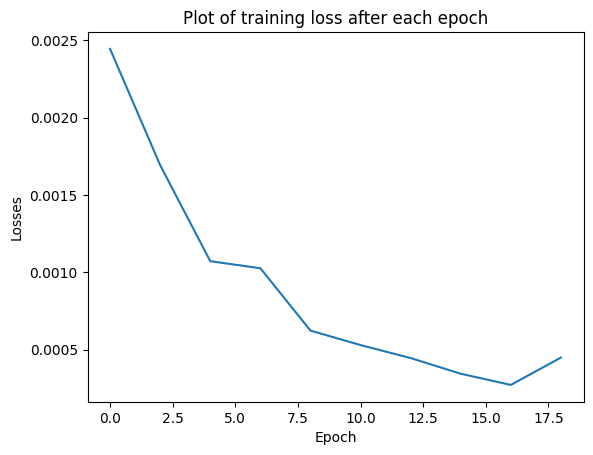

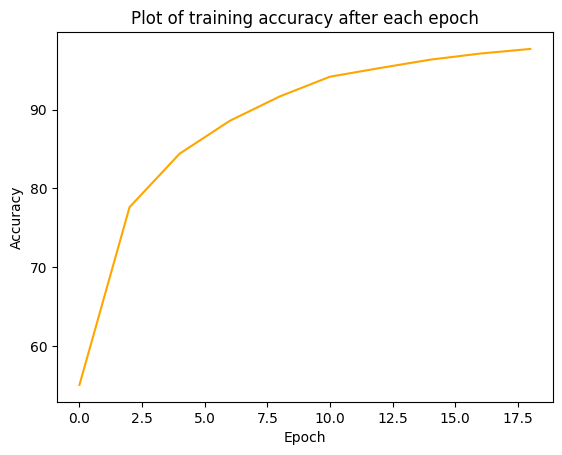

Final Testing Accuracy :  81.369995


In [6]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CIFAR10Dataset(Dataset):
  def __init__(self):
    super().__init__()

    transform = transforms.Compose([
        transforms.Resize((227,227)),
         transforms.ToTensor()])

    self.train_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform = transform,
    download=True
)
    self.test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,
    transform = transform,
    download=True
)

  def __len__(self):
    return self.train_dataset.shape[0]

  def __getitem__(self,index):
    return self.train_dataset[index]

class AlexNet(torch.nn.Module):
  def __init__(self):
    super(AlexNet,self).__init__()
    # Define the model layers
    self.conv1 = nn.Conv2d(3,96, kernel_size = 11, stride = 4)
    self.conv2 = nn.Conv2d(96,256, kernel_size = 5, stride = 1,padding=2)
    self.conv3 = nn.Conv2d(256,384,kernel_size=3, stride = 1, padding = 1)
    self.fc1 = nn.Linear(384*4*4,9216)
    self.fc2 = nn.Linear(9216,4096)
    self.fc3 = nn.Linear(4096,10)
    self.dropout = nn.Dropout(p=0.5, inplace=False)
    self.bn1 = nn.BatchNorm2d(96)  # Add batch normalization
    self.bn2 = nn.BatchNorm2d(256)  # Add batch normalization

    # Apply He initialization to the ReLU-based layers
    nn.init.kaiming_uniform_(self.conv1.weight, nonlinearity='relu')
    nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)  # Add batch normalization
    x = F.max_pool2d(x, kernel_size = 3, stride = 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, kernel_size = 3)
    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.softmax(self.fc3(x),dim = -1)
    return x

# MAIN PROGRAM
data_obj = CIFAR10Dataset()
model = AlexNet().to(device)

#------------------------------------------------------------------------------
#     TRAINING
#------------------------------------------------------------------------------
batch_size = 128
num_epochs = 20
total_train = 50000   # Total data points in the training dataset
all_losses = list()
all_accuracies = list()
dataloader = DataLoader(data_obj.train_dataset, batch_size=batch_size, shuffle=True)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas=(0.9, 0.999), weight_decay=0.0005)

for epoch in range(num_epochs):
  correct = 0
  loss = 0.0
  model.train()
  # batch = 0
  for images,labels in dataloader:
  #----------------------------------------------------------------------------------------
  #--------------------------------TRAINING LOSS-------------------------------------------
  #----------------------------------------------------------------------------------------
    images,labels = images.to(device),labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    one_hot_label = F.one_hot(torch.tensor(labels),10).float()
    loss = criterion(outputs, one_hot_label)
    loss.backward()
    optimizer.step()
    loss += loss.item()

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    batch_accuracy = sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])
    correct += batch_accuracy

  if epoch % 2 == 0:
    print('\n Loss for epoch ',epoch,': ',loss.item()/batch_size)
    print('\n Accuracy for epoch ',epoch,': ',(correct*100/total_train).cpu().numpy())
    print('\n Correct predictions for epoch ',epoch,': ',correct.cpu().numpy())#(correct*100/total_train).cpu().numpy())
    all_losses.append(loss.item()/batch_size)
    all_accuracies.append((correct*100/total_train).cpu().numpy())


# PLOT THE LOSSES
plt.plot(list(range(0,num_epochs,2)),all_losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Plot of training loss after each epoch")
plt.show()

# PLOT THE ACCURACY
plt.plot(list(range(0,num_epochs,2)),all_accuracies,color= "orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Plot of training accuracy after each epoch")
plt.show()

#------------------------------------------------------------------------------
#     TESTING
#------------------------------------------------------------------------------
test_loader = DataLoader(data_obj.test_dataset, batch_size=batch_size)

model.eval()
correct = 0
total_test = 10000    # Total data points in the testing dataset
with torch.no_grad():
  for images, labels in test_loader:
    images,labels = images.to(device),labels.to(device)
    outputs = model(images)

    # torch.max() returns two outputs, the maximum values and the corresponding index
    # We are intersted in the index, which is equivalent to the predicted digit
    _ ,predictions =  torch.max(outputs.data,1)     # Get maximum values in the output tensor, along the second dimension

    # Compare the predictions against labels, and count the correct ones
    correct += sum([predictions[i] == labels[i] for i in range(0,images.shape[0])])

print('Final Testing Accuracy : ',(correct*100/total_test).cpu().numpy())


**Best Test Accuracy: 81%**

---
---